# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
#from api_keys import weather_api_key
weather_api_key = "e69bfd32bc0f0682f70f7f0f33594f56"
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy
#print(weather_api_key)

C:\Users\KYNKE\AppData\Local\Temp\ipykernel_10160\3437173854.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #pause for 1 second using time.sleep()- keeps it from being disabled
        time.sleep(1)
        if 'coord' in city_weather:
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']

        # Append the City information into city_data list
            city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city
    except Exception as e:
       print(f"Error for city {city}: {e}")
       pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | merta
Processing Record 3 of Set 1 | inari
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | san luis de la loma
Processing Record 6 of Set 1 | prince rupert
Processing Record 7 of Set 1 | knyaze-volkonskoye
Processing Record 8 of Set 1 | cole harbour
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | colon
Processing Record 12 of Set 1 | toga village
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | praia
Processing Record 15 of Set 1 | aykhal
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | blackmans bay
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | iqaluit
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-28.88,100,100,2.62,RU,1707666581
1,merta,26.6500,74.0333,61.88,18,4,6.31,IN,1707666583
2,inari,68.9060,27.0288,-0.20,99,70,4.21,FI,1707666394
3,grytviken,-54.2811,-36.5092,41.54,92,36,11.54,GS,1707666589
4,san luis de la loma,17.2706,-100.8939,79.93,61,0,3.71,MX,1707666592


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../Module6/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../Module6/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-28.88,100,100,2.62,RU,1707666581
1,merta,26.6500,74.0333,61.88,18,4,6.31,IN,1707666583
2,inari,68.9060,27.0288,-0.20,99,70,4.21,FI,1707666394
3,grytviken,-54.2811,-36.5092,41.54,92,36,11.54,GS,1707666589
4,san luis de la loma,17.2706,-100.8939,79.93,61,0,3.71,MX,1707666592


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

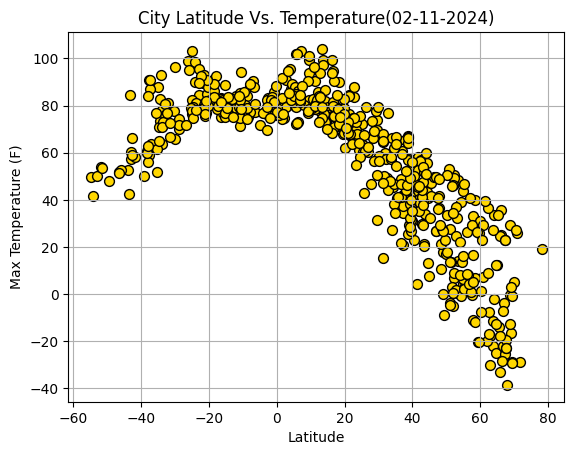

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
     city_data_df["Max Temp"],
    color="gold",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Temperature(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
# Save the figure
plt.savefig("../Module6/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

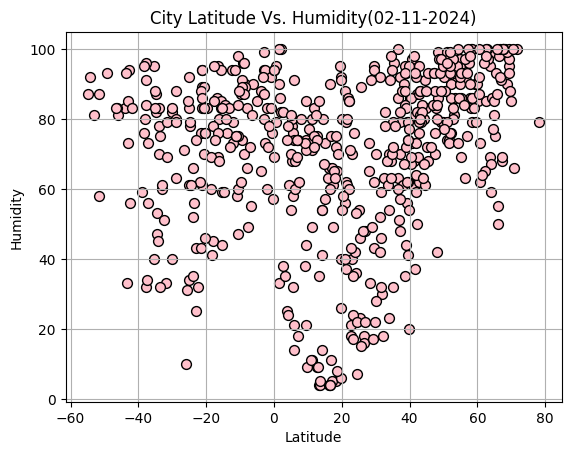

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
     city_data_df["Humidity"],
    color="pink",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../Module6/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

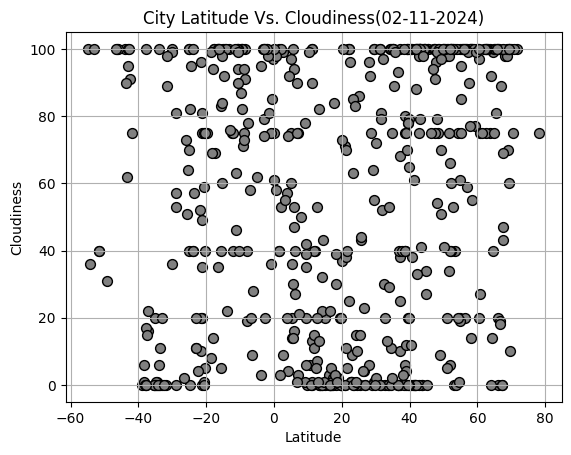

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df["Lat"],
     city_data_df["Cloudiness"],
    color="gray",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../Module6/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

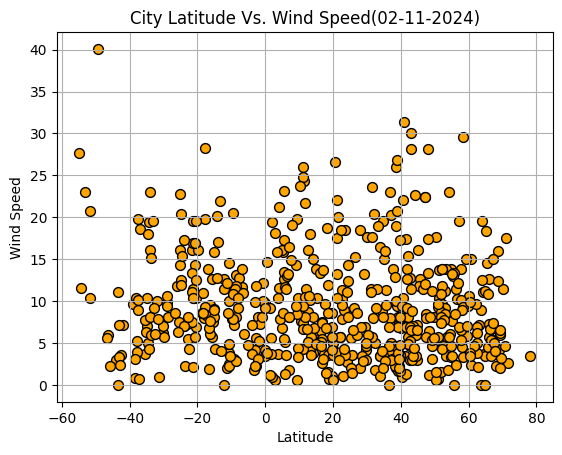

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
     city_data_df["Wind Speed"],
    color="orange",
    edgecolor="black",
    linewidths=1,
    marker="o",
    label="Cities",
    s=50
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%m-%d-%Y"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("../Module6/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, color):

    # compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_val= x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    #plot
    plt.scatter(x_values, y_values, color=color, edgecolor= "black", s=50)
    plt.plot(x_values,regress_val, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is {rvalue**2}")
    plt.show()

    

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-28.88,100,100,2.62,RU,1707666581
1,merta,26.6500,74.0333,61.88,18,4,6.31,IN,1707666583
2,inari,68.9060,27.0288,-0.20,99,70,4.21,FI,1707666394
4,san luis de la loma,17.2706,-100.8939,79.93,61,0,3.71,MX,1707666592
5,prince rupert,54.3161,-130.3201,38.89,100,75,23.02,CA,1707666595


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,41.54,92,36,11.54,GS,1707666589
9,port-aux-francais,-49.3500,70.2167,47.98,93,31,40.09,TF,1707666604
11,chonchi,-42.6128,-73.8092,66.31,56,91,3.62,CL,1707666610
14,edinburgh of the seven seas,-37.0676,-12.3116,63.61,73,16,18.57,SH,1707666616
15,waitangi,-43.9535,-176.5597,52.83,83,100,3.00,NZ,1707666619


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7847288810107672


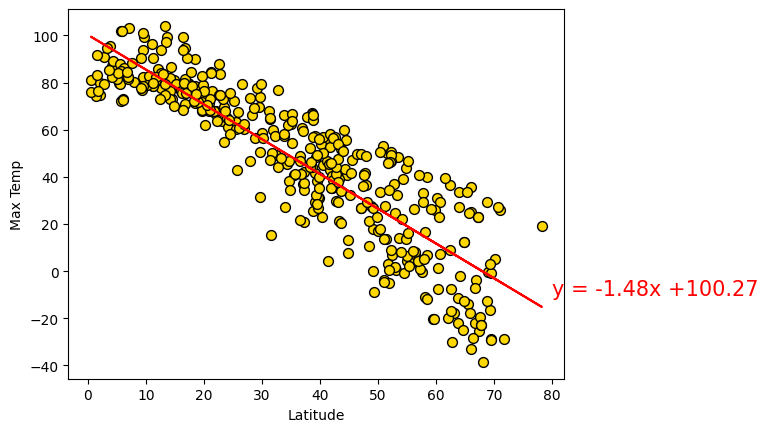

In [47]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(80,-10), "gold")


The r-value is 0.3147258113240178


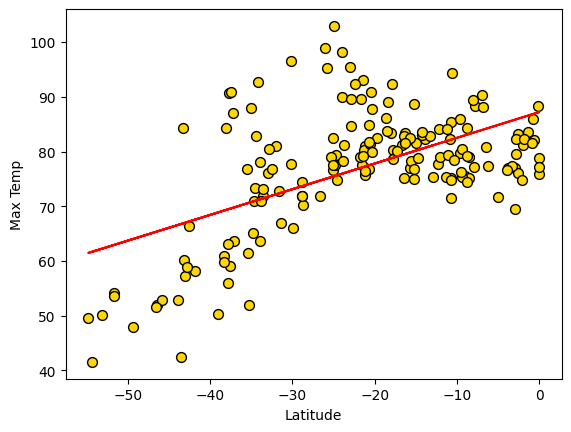

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp",(-70,0), "gold")


**Discussion about the linear relationship:** The high r value in the northern hemisphere indicates a strong positive relationship between latitude and max temperature. R values = 0.3 in the southern hemisphere which is weak positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.24729100286943362


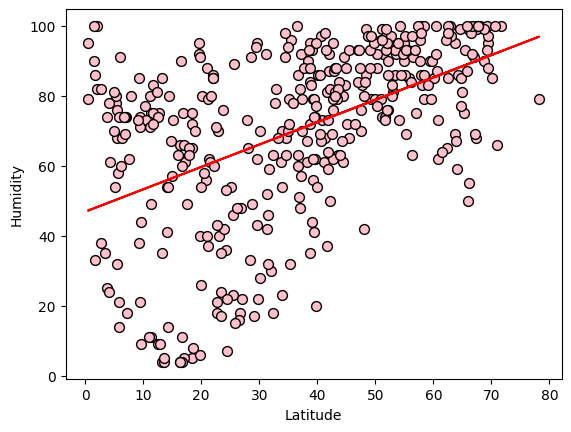

In [54]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(80,-10), "pink")


The r-value is 0.01923046009937012


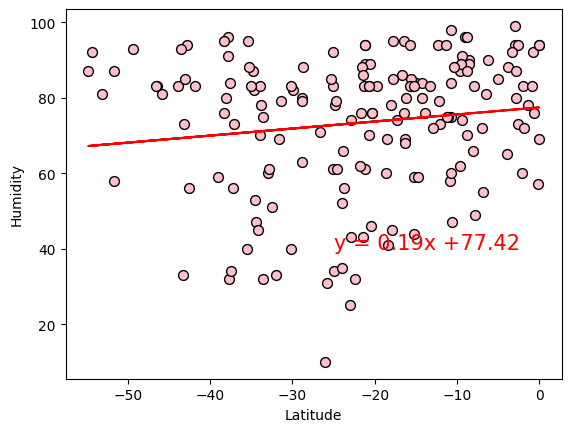

In [55]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-25,40), "pink")


**Discussion about the linear relationship:** The r values indicate there is a very weak to no positive correlation in the northern hemisphere between humidity and latitude. In the southern hemisphere there is almost no positive correlation between the humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.15016872992329597


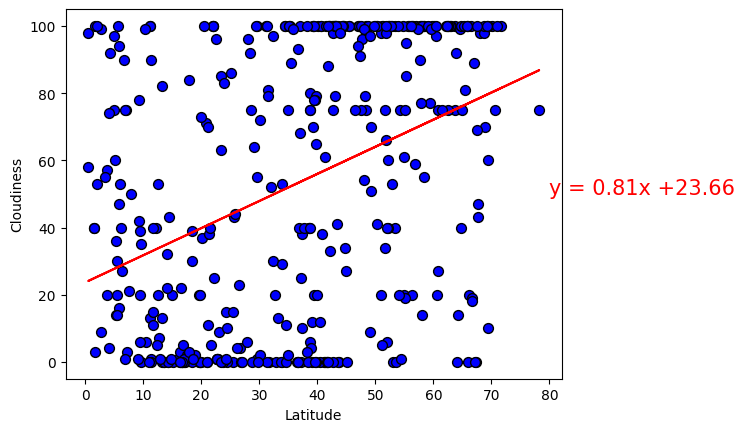

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(80,50), "blue")


The r-value is 0.08039232459208973


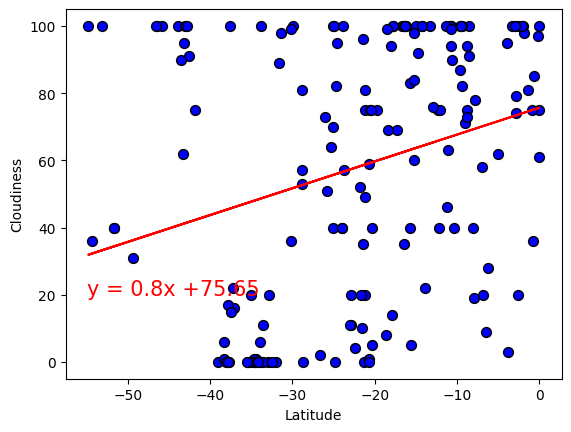

In [60]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-55,20), "blue")


**Discussion about the linear relationship:** For both northern and southern hemisphere this is a weak to no positive correlation between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0070350055397849455


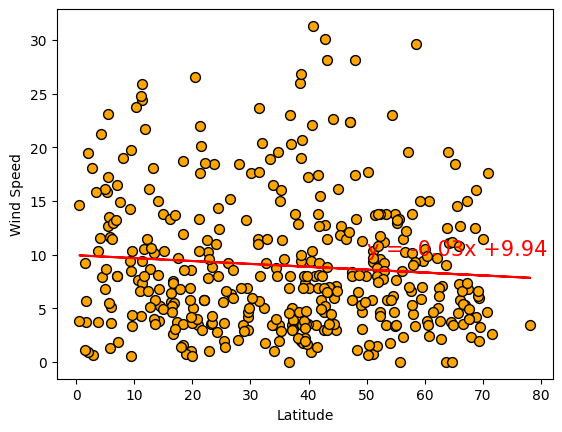

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(50,10), "orange")


The r-value is 0.027262303351271576


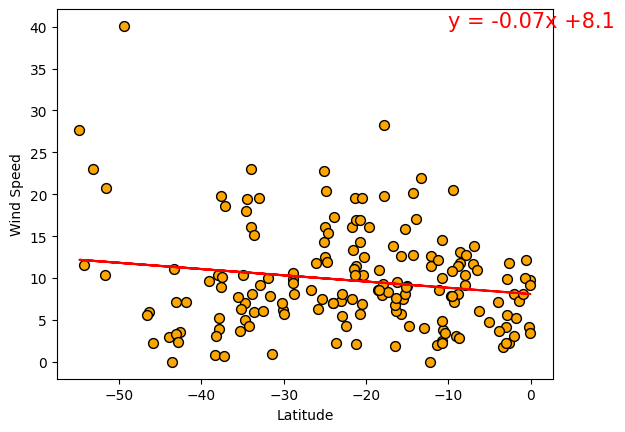

In [65]:
# Southern Hemisphere
# Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-10,40), "orange")


**Discussion about the linear relationship:** For both the northern and southern hemispheres there is a weak to almost none relative correlation between the latitude and wind speed.